# 탐색 및 분석을 위한 시각화
#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 프래프를 그림
    - 추세를 볼 수 있음
- 막대 그래프 : df.plot(kind='bar')
    - default (수직), df.plot(kind='barh(수평)',stacked=True,alpha=0.8)
    - x축에 따라서 어떻게 분포가 되어있는지 막대 형식으로 나타냄
- 히스토그램 : df.plot(kind='hist') 
    - 각 구간의 빈도(frequency)를 나타냄
- 산점도 : df.plot(x='',y='',kind='scatter') 
    - x,y 를 넣어줘야함 ㅡ> 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공 
    - 4사분위수를 이용
    - 1사분위와 3사분위를 기준으로 박스를 그려주고 최댓값과 최솟값이 있음
    - 이상치를 탐지하기 위한 upper whisker와 lower whisker를 그림으로 같이 보여줌
    - IQR이란 개념이 존재 3사분위에서 - 1사분위까지의 차이를 나타냄

#### matplotlib 
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn (matplotlib보다 세련된)
- sns.hist plot(x= ) -> 변수에 대한 히스토그램 표시
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.jointplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

https://seaborn.pydata.org/api.html

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [15]:
li = ['Date','Close','Start','High','Low','Volumn'] # 컬럼명 변경

# df.drop('전일종가', axis=1, inplace=True) -> 전일종가 제거
df.columns=li
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
# Q. Date를 datetime 으로 변경한 후 인덱스로 셋팅하세요.

In [6]:
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volumn'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

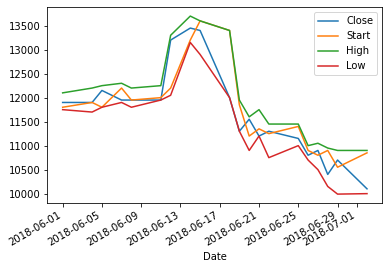

In [11]:
# 선그래프
df1.plot() 

<AxesSubplot:xlabel='Date'>

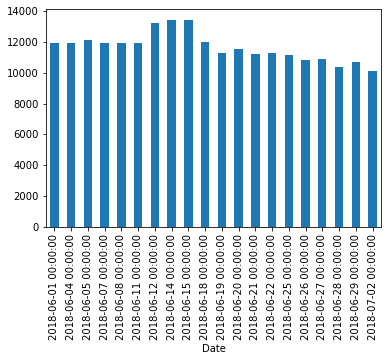

In [14]:
df2 = df1.sort_index() # 소트해서 df2에 담고
df2.Close.plot(kind='bar') # 막대그래프 -> 종가를 날짜별로 보여줌

In [ ]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.

<AxesSubplot:ylabel='Frequency'>

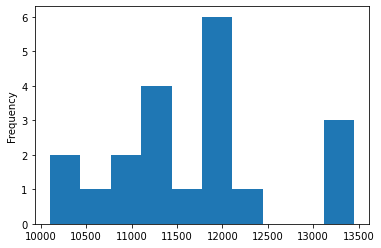

In [15]:
df2.Close.plot(kind='hist') 

In [16]:
df.rename(columns={'Volumn':'Volume'}, inplace=True) # 컬럼이름 변경 , 원본 반영
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

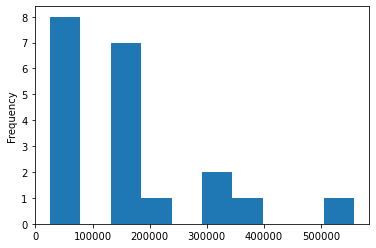

In [17]:
df.Volume.plot(kind='hist') # 구간별로 

In [18]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

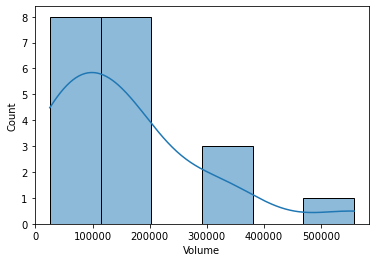

In [23]:
import seaborn as sns # Seaborn은 matplotlib 기반의 시각화 라이브러리
sns.histplot(df.Volume, kde=True) # seaborn으로 그리면 그림이 더 수려함
# kde=true -> 밀도함수를 그려줌 안에 면적이 1이 됨, 1로 환산해서 전체 분포가 어떻게 되는지를 보여줌

<AxesSubplot:xlabel='Close', ylabel='Volume'>

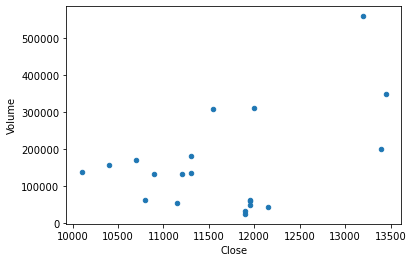

In [24]:
# 산점도 -> 각 변수 간의 상관관계를 보여줌
df.plot(x='Close', y='Volume',kind='scatter')

<AxesSubplot:>

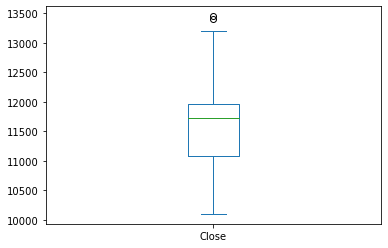

In [25]:
# Box Plot -> 어떤 특정 컬럼의 혹은 데이터프레임의 여러개의 컬럼의 분포를 동시에 보여줄 수 있디
# 여기서는 특정 컬럼 close라는 컬럼의 분포를 보여주고 있음
df.Close.plot(kind='box')

### Box plot 의미 해석
 - IQR(Inter Quartile Range) : 제3사분위수(Q3)-제1사분위수(Q1)
 - lower whisker: 최소값  
     - Q1 - 1.5 * IQR 이내인 값중에서 최솟값
 - upper whisker: 최대값
     - Q3 + 1.5 * IQR 이내인 값중에서 최댓값
 - 이상치 : lower whisker 보다 작은 데이터, upper whisker 보다 큰 데이터
 - Q1 = 25% -> 100명 중 75등 수치
 - Q2 = 50% -> 100명 중 50등 수치
 - Q3 = 75% -> 100명 중 25등 수치

<img src='4사분위.png' width='600'>

In [26]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [ ]:
# Q. Close 칼럼의 이상치를 구하세요.

# pandas의 quantile함수의 q(백분위수)는 0과 1사이 값을 입력하고
# numpy의 percentile함수의 q(백분위수)는 0과 100사이 값을 입력합니다. 
# 따라서 중앙값을 구할때 quantile( ) q값을 0.5, percentile( ) q값을 50으로 입력해야 합니다.

In [27]:
Q1 = df.Close.quantile(.25) # 백분위수 구하기quantile( ) -> 25%
Q3 = df.Close.describe()['75%'] # df.close.describe(percentiles)[.75])와 동일
IQR = Q3 - Q1 # IQR -> 3사분위에서 1사분위를 뺀 값
upper_whisker = Q3 + 1.5 * IQR # Q3 + 1.5 * IQR 이내인 값중에서 최댓값

print(upper_whisker,'\n')
print(df.Close.sort_values(ascending=False)[:5],'\n') # 내림차순 5개 출력
print('upper_whisker 13200을 벗어나는 값 선택:')

df.Close.loc[df.Close>Q3+1.5*IQR]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 

uw 13200을 벗어나는 값 선택:


11    13400
12    13450
Name: Close, dtype: int64

[과제] df_ep 데이터 프레임으로 다음을 수행하세요
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

<AxesSubplot:xlabel='year'>

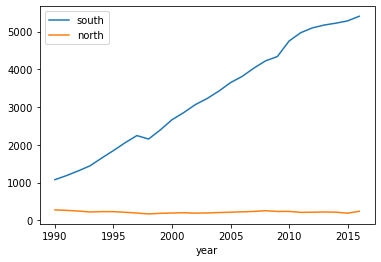

In [8]:
# df_ep 엑셀파일을 데이터프레임으로 불러오기
df_ep = pd.read_excel('./dataset/df_ep.xlsx')  # excel파일 읽기 -> read_excel
df_ep.set_index('year', inplace=True) # year를 index로 설정 원본 반영
# df_ep

# 선 그래프
df_ep.plot()

<AxesSubplot:xlabel='year'>

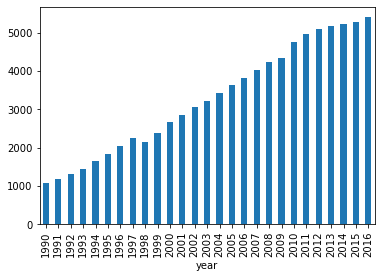

In [32]:
# 'south' 컬럼의 막대그래프
df_ep.south.plot(kind='bar') # 남한 데이터

<AxesSubplot:ylabel='Frequency'>

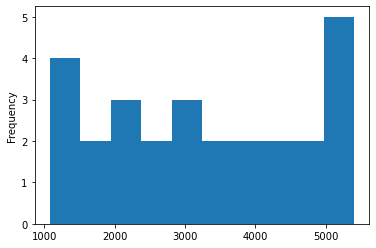

In [33]:
# 'south' 칼럼의 히스토그램
df_ep.south.plot(kind='hist') # dataframe명.칼럼명.plot(그래프 종류)

<AxesSubplot:>

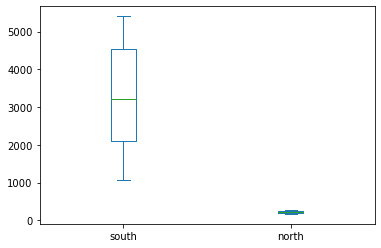

In [10]:
# box plot
df_ep.plot(kind='box')

In [21]:
display(df.Start)

0     10850
1     10550
2     10900
3     10800
4     10900
5     11400
6     11250
7     11350
8     11200
9     11850
10    13400
11    13600
12    13200
13    12200
14    12000
15    11950
16    12200
17    11800
18    11900
19    11800
Name: Start, dtype: int64

In [ ]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)

<AxesSubplot:>

13437.5 

11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64 

upper whisker 13400을 벗어나는값 선택


11    13600
Name: Start, dtype: int64

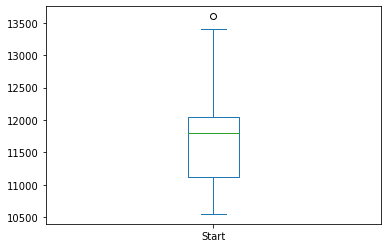

In [25]:
display(df.Start.plot(kind='box')) # boxplot으로 그려줌
Q1 = df.Start.describe()['25%'] # df.start.describe(percentiles)[.25])와 동일
Q3 = df.Start.describe()['75%'] 

IQR = Q3 - Q1 # IQR 구하기 ->  3사분위 - 1사분위
upper_whisker = Q3 + 1.5 * IQR # upper whisker는 3사분위 + 1.5*IQR 한 값이다
print(upper_whisker, '\n')

print(df.Start.sort_values(ascending = False)[:5],'\n') # 내림차순으로 5개 출력
print('upper whisker 13400을 벗어나는값 선택')
df.Start.loc[df.Start > Q3 + 1.5 * IQR] # loc에 조건식 써줌으로써 값 추출


(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

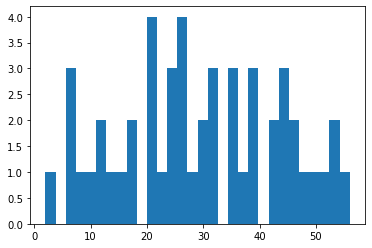

In [28]:
import matplotlib.pyplot as plt
np.random.seed(0) # 난수 고정
        
data = np.arange(50) + np.random.randint(1,10,size =50) # 1에서 9사이의 범위에서 -> 50개의 임의의 정수 생성
plt.hist(data, bins=30)
# hist() 함수의 bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다.

<img src='./dataset/histogram_bins.png' STYLE='width:3px;'>

In [34]:
# 폰트 설정 방법
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


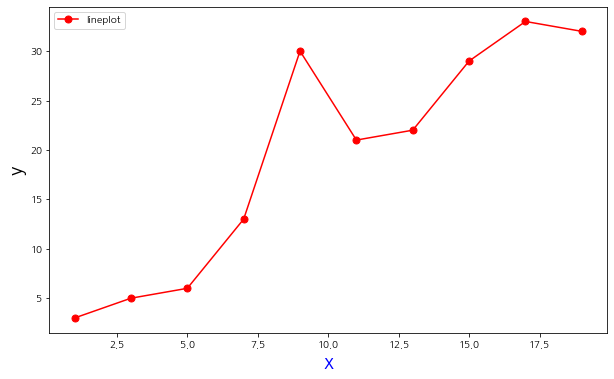

In [36]:
import numpy as np
x = np.arange(1,21,2) # 1 ~ 20 사이를 +2씩
y = np.array([3,5,6,13,30,21,22,29,33,32])
font1 = {'family': 'NanumGothic', 'size': 24, 
         'color': 'blue'} # 폰트에 색상 지정

plt.figure(figsize=(10,6))
plt.plot(x,y,color='red',marker='o', markersize=7)

plt.xlabel('x',size=20, fontdict=font1) # x축 제목 , 색감적용
plt.ylabel('y',size=20) # y축 제목
plt.legend(labels=['lineplot']) # 범례

In [46]:
# 0~ 19까지 *2 -> 0 ~ 38 범위의 임의의 정수 생성 + 1행 20열짜리 정규분포 난수 생성 * 10 
y1 = np.arange(20)*2 + np.random.randn(20)*10 
y1 

array([-14.91257593,   6.39391701,   5.66673495,  12.35031437,
        31.83144775,  19.44479487,   2.87177775,  25.17016288,
         2.84092589,  13.38415395,  19.31758395,  39.13342722,
        16.55245178,  17.73561461,  27.01547476,  23.36521714,
        43.26635922,  23.20068492,  24.52531348,  33.62179955])

Text(0.5, 1.0, 'Line Graph')

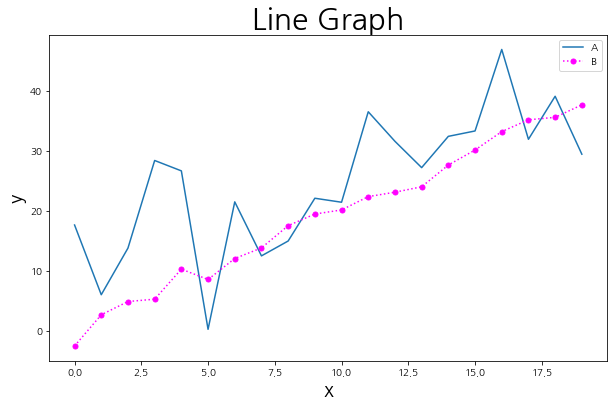

In [50]:
import numpy as np
np.random.seed(0)
x  = np.arange(20) # 0 부터 19까지
y1 = np.arange(20)*2 + np.random.randn(20)*10  # np.random.randn 평균이 0 표준편차가 1인 정규분포 난수 생성
y2 = np.arange(20)*2+np.random.randn(20) # 정규분포 난수 20개 생성 1행 20열로

plt.figure(figsize=(10,6))
plt.plot(x, y1) # 파랑선
plt.plot(x, y2, color='magenta',marker='o', markersize=5, linestyle='dotted') # 분홍 점선

plt.xlabel('x',size=20) # x축 라벨
plt.ylabel('y',size=20) # y축 라벨
plt.legend(labels=['A','B']) # 범례
plt.title('Line Graph',size=30) # 차트 제목

Text(0.5, 0, 'x')

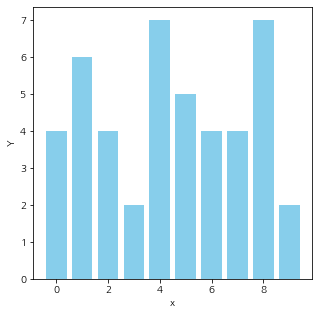

In [68]:
# 막대그래프
y= np.random.randint(2,10,size=10) # 2부터 9까지 -> 10개
# print(y) -> [9 6 5 4 9 9 7 7 7 2]
x = range(len(y))
# print(x) -> range(0, 10)

plt.figure(figsize=(5,5)) # 최초 창의 크기 설정
plt.bar(x,y,width=0.8, color='skyblue') # bar 설정 -> x, y 

plt.ylabel('Y')
plt.xlabel('x')

In [51]:
import pandas as pd
df = pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


In [ ]:
# Q. movie.csv에서 x축 movieNm, y축 salesAmt로 막대그래프를 그리세요.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

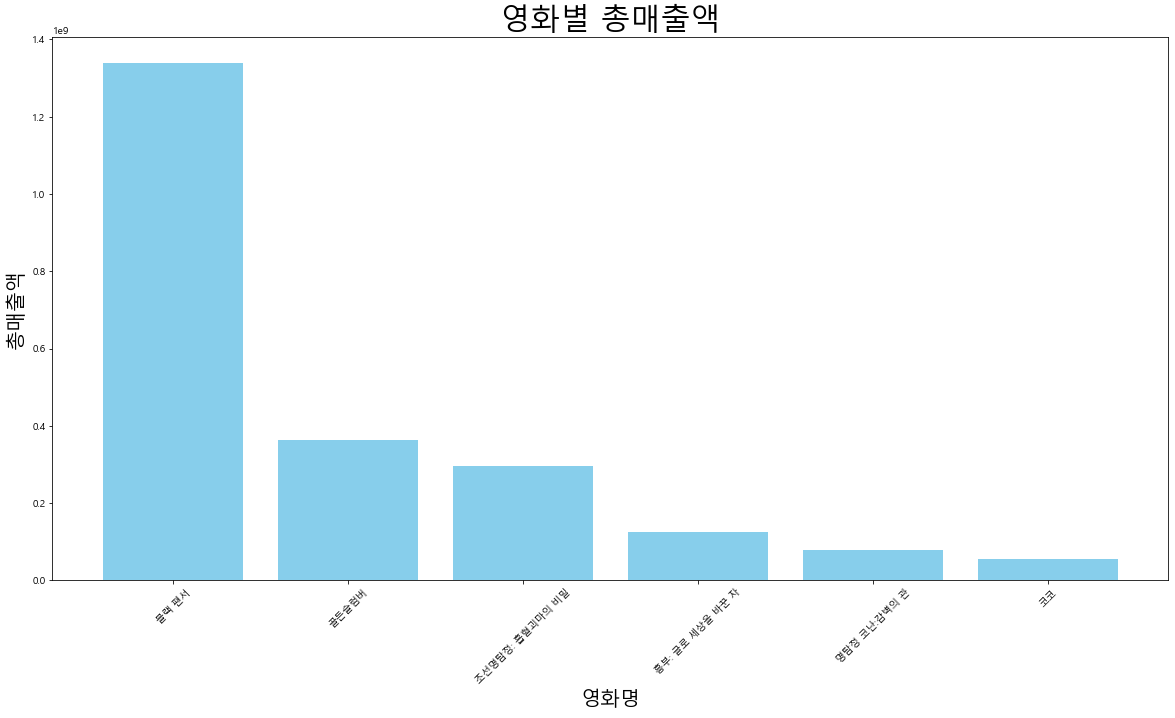

In [70]:
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리

plt.figure(figsize=(20,10))
plt.bar(df.movieNm, df.salesAmt, color= 'skyblue') # bar -> x, y 설정 

plt.title('영화별 총매출액', size=30)
plt.xlabel('영화명',size=20)
plt.ylabel('총매출액',size=20)
plt.xticks(rotation=45) # x축 눈금 레이블 텍스트를 회전

Text(0, 0.5, 'weight')

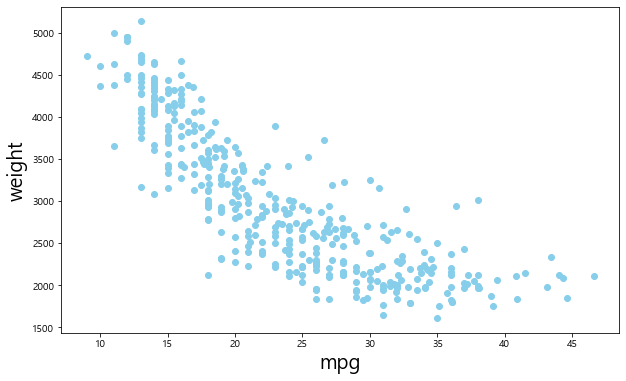

In [72]:
# scatter plot

# 판다스로 xlsx 안 열어질 경우 -> engine 사용
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx', engine='openpyxl') 
x= df_auto.mpg  # x값 설정
y= df_auto.weight # y값 설정

plt.figure(figsize=(10,6)) # 와꾸, 틀 생성
plt.scatter(x,y,color='skyblue') # 틀 생성하면 그 다음 plt.* 그려줌 

plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)

## 히스토그램(관계 시각화 : 히스토그램, 산점도, 버블차트)
   - 탐색적 분석단계에서 변수의 분포, 중심 경향, 퍼짐 정도, 치우침 정도 등을 한눈에 살펴볼 수 있는 시각화 종류
   - 히스토그램을 그릴 때는 bin의 개수를 적당히 설정하는 것이 매우 중요합니다. 
   - bin 개수가 너무 적으면 분포가 뭉뚱그려지며, bin 개수가 너무 많으면 이빨빠지 빗처럼 보기에 이상해집니다.
   - 대개의 경우 bins 값을 입력하지 않은채로 default 세팅으로 해서 그래프를 그려도 제법 보기에 좋게 나오는데요, 혹시 마음에 들지 않는다면 bins=x 값을 변경해가면서 여러번 시도를 해보시기 바랍니다. 
   - Y축을 빈도수(frequency)가 아니라 density로 하고 싶을 때는 density=True 를 설정해주면 됩니다.
   - 히스토그램의 색깔은 facecolor = 'blue' 식으로 설정해주며, alpha 는 투명도(0~1)를 조절할 때 사용합니다. alpha 가 0에 가까워질수록 투명해집니다. 
   - X축과 Y축 이름은 plt.xlabel(), plt.ylabel() 함수로 지정하며, 제목은 plt.title()를 사용하여 추가할 수 있습니다.
   - X축과 Y축의 범위를 강제로 지정해주고 싶으면 plt.axis(X축 시작, X축 끝, Y축 시작, Y축 끝)의 순서대로 값을 입력해줍니다. 

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

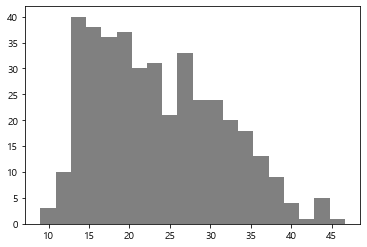

In [73]:
# histogram 
plt.hist(x,bins=20, color='gray')

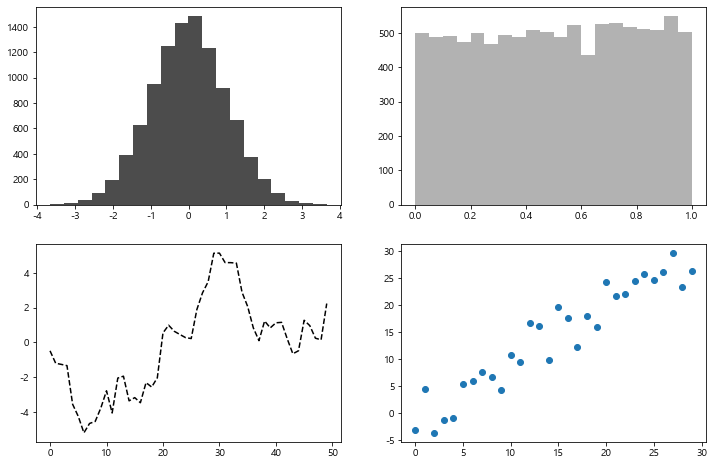

In [80]:
# 틀 생성 plt.figure(figsize=(.))
fig = plt.figure(figsize=(12,8)) 

# figure가 2 x 2크기이고 4개의 서브플롯
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

np.random.seed(0)

# alpha는 투명도(0~1)를 조절할 때 사용합니다. 
# alpha 가 0에 가까워질수록 투명해집니다. 

ax1.hist(np.random.randn(10000), bins=20, color='k', alpha=0.7)
ax2.hist(np.random.rand(10000), bins=20, color='k',alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(), 'k--') # 'k--' -> 점선 스타일
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30)) # scatter -> x, y 설정

<img src='./dataset/add_subplot.png'>

In [ ]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

# 그래프 선 옵션
# 그래프를 그릴 때 표시 되는 색이나 마커 패턴을 바꾸는 것 확인할 수 있다.
# 색상: b(파란색), g(초록색), r(빨간색), c(청록색), y(노란색), k(검은색), w(흰색)
# 마커: o(원), v(역삼각형), ^(삼각형), s(네모), +(플러스), .(점)

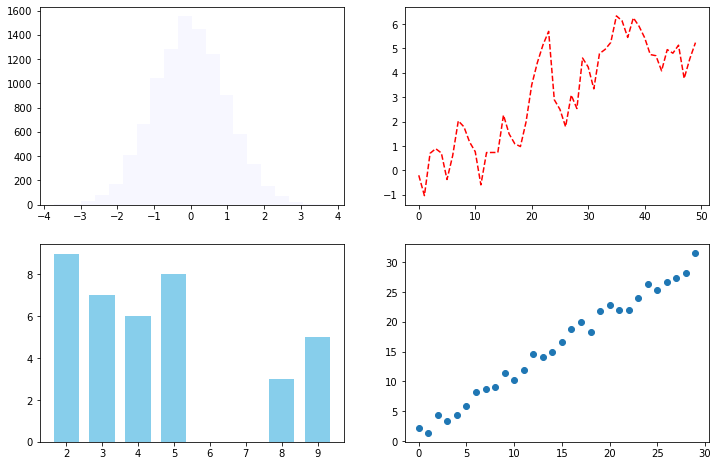

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,8))

# figure가 2x2 크기이고 4개의 서브플룻
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

np.random.seed(0)
ax1.hist(np.random.randn(10000), bins=20, color='blue', alpha=0.03)
ax2.plot(np.random.randn(50).cumsum(), 'r--') # cumulative sum 누적 합  '컬러--점선'
# ax3.bar(np.random.randn(10),np.random.randn(10),width=0.8,color = 'skyblue' )
ax3.bar(np.random.randint(2,10,size=10), range(10), width=0.7, color = 'skyblue' )
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.rand(30))
# np.random.rand -> 0부터 1사이의 균일분포 난수 생성
# np.random.randn -> 표준정규분포에서 난수 생성

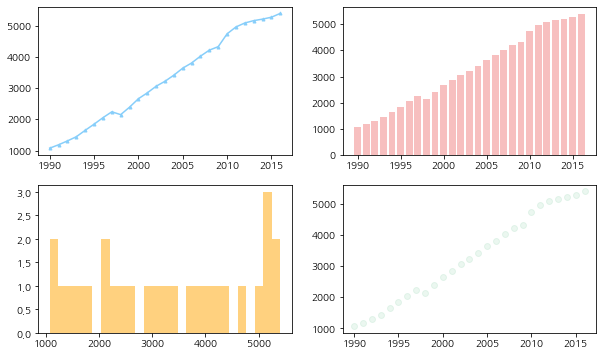

In [58]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx') # read_excel 데이터 읽어오기
df_ep.set_index('year',inplace=True)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.xlabel

ax1.plot(df_ep.south, color='lightskyblue', marker='^',markersize=3)
ax2.bar(df_ep.index, df_ep.south, color='lightcoral',width=0.8, alpha=0.5) # x, y 설정
ax3.hist(df_ep.south, bins=len(df_ep),color='orange',alpha=0.5)
ax4.scatter(df_ep.index, df_ep.south, color='mediumseagreen',alpha=0.1) # alpha가 0에 가까울수록 선명도가 희미해짐

#####  np.random.randint : (시작, n-1) 사이의 랜덤숫자 1개 뽑아내기
##### np.random.rand(m,n) : 0 ~ 1의 균일분포 난수를 matrix array(m,n) 생성
##### np.random.randn(m,n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수를 matrix array(m,n) 배열 생성 
- random.randn(10, ) -> 1행 10열짜리 임의의 표준정규분포 난수

In [63]:
a= np.random.randn(10,)
print(a)
print(a.ndim)
print(a.shape)

b= np.random.randn(2,5)
b

[ 0.73885996 -0.60632421  0.14528494  0.07602604  1.15533096  2.1577623
 -1.41907445  0.77011942  0.86809099 -0.29140284]
1
(10,)


array([[ 0.88027444,  0.38264824, -0.38952526, -0.19449992, -0.40315333],
       [-0.60860117, -1.39049536, -0.02592945,  1.08266513,  0.6950763 ]])

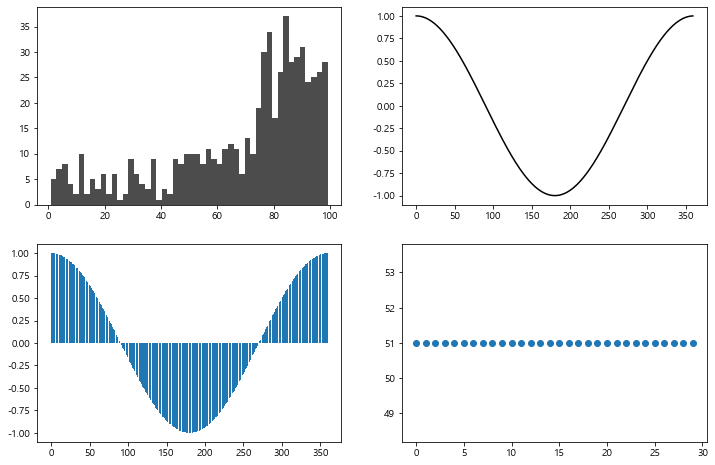

In [86]:
import math

fig = plt.figure(figsize=(12,8))

# 2x2 plot
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

#=======================히스토그램=======================
num=np.zeros(600) # 0~ 599 -> 총 600개 와꾸 틀

for i in range(100): # 0~ 99
    num[i]= np.random.randint(1,45)
for i in range(100,250): # 100 ~249
    num[i]=np.random.randint(45,75)
for i in range(250,600): # 250 ~ 599
    num[i]=np.random.randint(75,100)
ax1.hist(num,bins=50,color='k',alpha=0.7)

#=======================선=======================
x=np.arange(360) # 0 ~ 359
y=[]
for i in x:
    a=math.cos(math.pi*(i/180))
    y.append(a)
ax2.plot(x,y, color='k')

#=======================막대=======================
ax3.bar(x,y,width=0.8)

#=======================산점도=======================
sc_x =np.arange(30)
sc_y = np.full(30,51) # np.full 30개를 모두 51로 초기화
ax4.scatter(sc_x,sc_y)

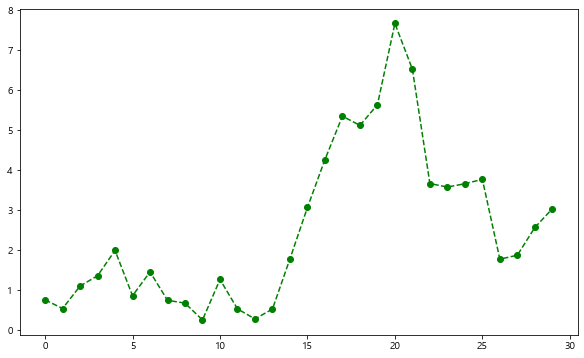

In [91]:
from numpy.random import randn

plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='g',marker='o') # 정규분포 난수 30개 뽑은것의 누적합

In [86]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Q. t3에서 age열을 범주화한 후 age_cat 열을 추가하세요. 

In [87]:
def catage(age): # 사용자함수를 이용하여 조건 작성
    cat=''
    if age<10: cat ='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat # cat반환

t3['age_cat']= t3.age.apply(lambda x: catage(x)) # 새로운 컬럼 추가 = t3.age에 apply함수 사용해 람다 함수 매핑
                                                       # t3.age.apply(lambda(사용자함수 호출))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


In [88]:
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",20s
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30s
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",20s


In [89]:
# 칼럼추가 하고 1로 초기화
t3['Ratio'] =1 
t3.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,Ratio
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",20s,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Child,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Child,1


In [90]:
# age_cat별로 총 개수 
df_age_cat = t3.groupby('age_cat').sum()
df_age_cat

,pclass,survived,age,sibsp,parch,fare,body,Ratio
age_cat,,,,,,,,
20s,838,127,8402.00,112,77,9198.3038,5125.0,344
30s,488,98,7855.50,80,73,9578.5332,5020.0,232
40s,250,52,5958.50,50,68,5723.5168,3429.0,135
50s,101,32,3751.50,29,21,4384.9541,1889.0,70
Child,216,50,330.17,135,114,2403.4248,4.0,82
Eldery,755,85,2578.00,142,82,7726.7706,2009.0,303
Teen,356,56,2380.00,105,69,4534.9836,1982.0,143


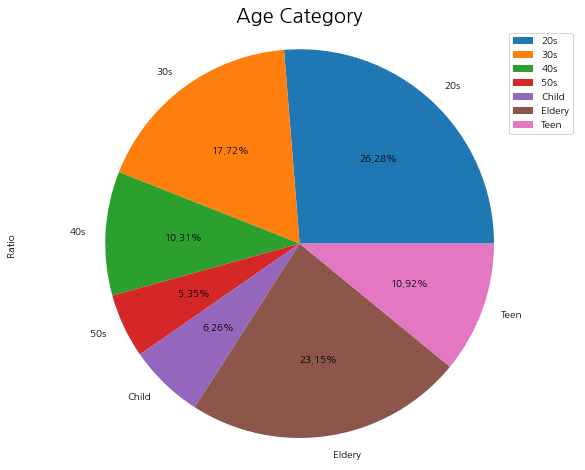

In [91]:
# 원형 차트(pie) 그리기
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct='%.2f%%', # autopct 부채꼴 안에 표시될 숫자의 형식을 지정 -> 백분율 소수점 두째자리까지
                     startangle=0) # startangle는 부채꼴이 그려지는 시작 각도를 설정

plt.title('Age Category', size=20)
plt.axis('equal') # x, y축 범위 설정 -> 각 축의 범위와 축의 스케일을 동일하게 설정
plt.legend(labels=df_age_cat.index, loc='best') # 범례는 df.age_cat의 index로 설정
                                        # loc= best 자동으로 계산하여 최적의 위치에 레전드를 위치시킴

<AxesSubplot:xlabel='length', ylabel='Count'>

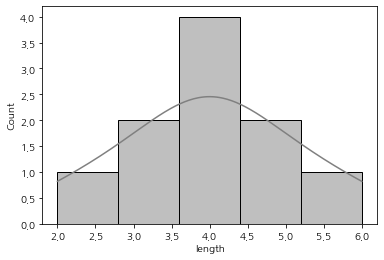

In [101]:
# 물고기 종류별 몸길이 데이터
import seaborn as sns

df = pd.read_csv('dataset/4_fm2.csv')

# 종류별 몸길이 데이터 추출
length_a = df.query('species=="A"')['length'] # 쿼리 사용 -> df.query()[]
length_b = df.query('species=="B"')['length'] 

# kde -> 커널 밀도 함수(Kernel Density Estimator) : 히스토그램 같은 분포를 부드럽게 곡선화 시켜서 그려줌
sns.histplot(length_a,color='gray',kde=True)

# 밀도 분포 파라미터 디테일하게 조정하기 
# kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })

<AxesSubplot:xlabel='species', ylabel='length'>

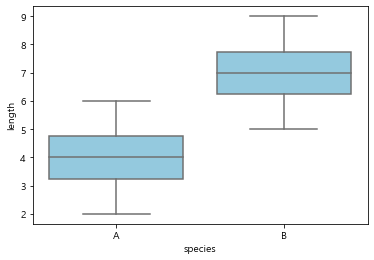

In [110]:
# boxplot -> x축, y축, data, color설정
sns.boxplot(x='species',y='length',data=df,color='skyblue') 

<AxesSubplot:xlabel='species', ylabel='length'>

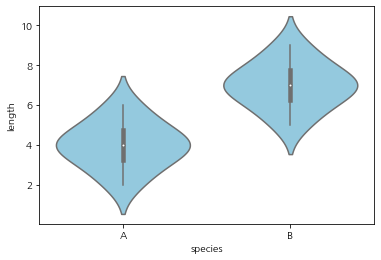

In [103]:
# 바이올린 플롯 -> 데이터 세트의 분포를 시각화 해준다.
sns.violinplot(x='species',y='length',data=df,color='skyblue')

## 바이올린 플롯 해석 방법
- 바이올린 플롯은 이렇게 데이터 세트의 분포를 시각화 해준다.
- 중심선을 따라 대칭인 KDE 플롯이 있다. (KDE 플롯은 이전 포스팅 참고)
- 가운데 흰색 점은 중앙값(median)을 나타낸다.
- 바이올린 중앙의 두꺼운 선은 사분위 범위를 나타낸다.
- 바이올린 중앙의 얇은 선은 신뢰 구간을 나타낸다. (bar plot과 마찬가지로 95% 신뢰 구간이 표시된다.)
- 결국 바이올린 플롯은 KDE 플롯과 Box 플롯을 하나로 합쳐놓은 형태라고 생각하면 된다…!

In [113]:
df1 = df.copy()
df1.iloc[5,1] = 10 # 5번째행 2열 
df1.iloc[10,1] =2 # 11번째행 2열
display(df1)

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,10
6,A,4
7,A,5
8,A,5
9,A,6


In [ ]:
# [과제] df1으로 박스플롯을 확인한 후 이상치를 구하세요.

## 조인트 플롯
- 두개의 수치형 변수 간의 관계를 연구 할 수 있다.
-  차트의 중앙에서 상관 관계 그래프를 표시해주는데 scatter(산점도), hex(헥스 빈 플롯), 2D hist 또는 2D density 플롯을 사용하는 것이 일반적이다.
- 그래프의 상단과 오른쪽에 있는 marginal 그래프는 히스토그램 또는 밀도 플롯을 사용하여 두 변수의 분포를 보여줄 수 있다.

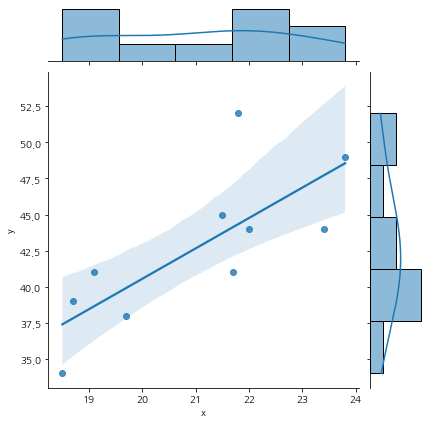

In [102]:
import warnings
warnings.filterwarnings('ignore')

cov_df = pd.read_csv('dataset/4_cov.csv')

# sns.jointplot(cov_df.x, cov_df.y)
# 중앙 그래프 선택 -> kind 타입 설정 가능 -> scatter(선점도), reg(회귀선 그래프), kde(확률밀도), hex(헥스빈 그래프)
sns.jointplot(cov_df.x, cov_df.y,kind='reg') # 회귀선 그래프 사용

In [16]:
import pandas as pd

df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


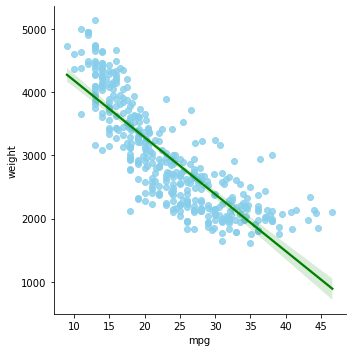

In [22]:
# scatter_kws -> 사이즈, 컬러 조절
import seaborn as sns

sns.lmplot(x='mpg',y='weight',data=df_auto, scatter_kws={'color':'skyblue'}, line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

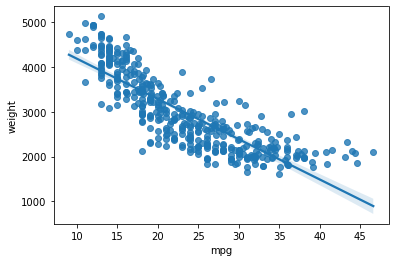

In [24]:
# 추세선을 넣을 때 regplot 사용 -> 선 위아래로 옅게 표시된 부분은 추세선의 95% 신뢰구간을 나타냅니다.
sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg=True)  # fit_ reg -> 선형 회귀선이 그려짐

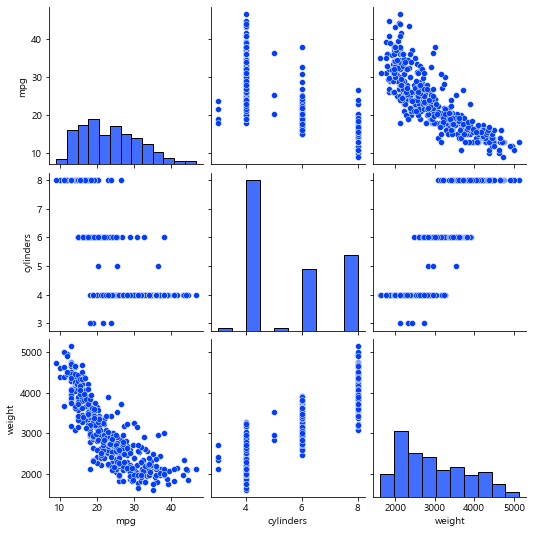

In [122]:
# 산점도 행렬
# 데이터에 들어 있는 각 컬럼(열)들의 모든 상관 관계를 출력
# 3차원 이상의 데이터라면 pairplot 함수를 사용해 분포도를 그립니다.

#– pairplot은 그리드(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다.
# 또한, 숫자형 column에 대해서만 그려준다.
sns.set_palette("bright")
df2 = df_auto[['mpg','cylinders','weight']]
sns.pairplot(df2)

In [ ]:
# 히트맵 <비교 시각화> -> 스타차트, 체르노프 페이스, 평행좌표 그래프, 다차원 척도법
# 왜 heatmap을 사용하는가?
# heatmap을 사용하면 두 개의 카테고리 값에 대한 값 변화를 한눈에 알기 쉽다.
# 대용량 데이터도 heatmap을 이용해 시각화 한다면 이미지 몇장으로 표현이 가능하다.

ax=sns.heatmap(df, # 데이터
               vmin=100, # 최솟값
               vmax=700, # 최댓값          
               cbar=True, # colorbar의 유뮤          
               center=400, # 중앙값 선정          
               linewidths=0.5 # cell사이에 경계선을 집어 넣는다.          
               annot=True, fmt="d" # annot -> 각 cell의 값 표기 유무, tmt -> d 정수 형태(integer format)로 숫자를 입력      
               cmap='Blues' # 히트맵의 색을 설정 

Text(0.5, 1.0, 'Heatmap of the Dataset')

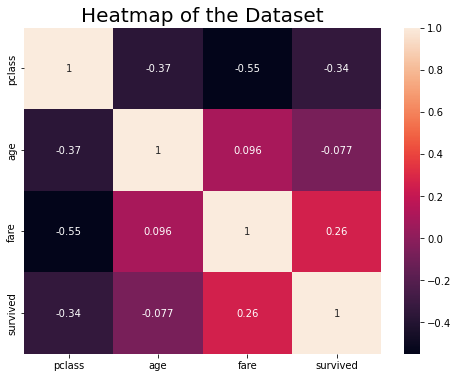

In [26]:
import matplotlib.pyplot as plt
tdf = sns.load_dataset('titanic')
plt.figure(figsize=(8,6))

# dataFrame의 pcalss, age, fare, survived의 상관관계(corr)를 수치로 보여줌
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True) # annot=True로 해야 수치 표현도 가능
plt.title('Heatmap of the Dataset', fontsize=20)

In [113]:
# pivot table을 활용해서 heatmap을 그릴 수 있음
# 피봇테이블 -> 성별 클래스별 생존율 평균값
table = tdf.pivot_table(index=['sex'], columns=['class'], values=['survived'], aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

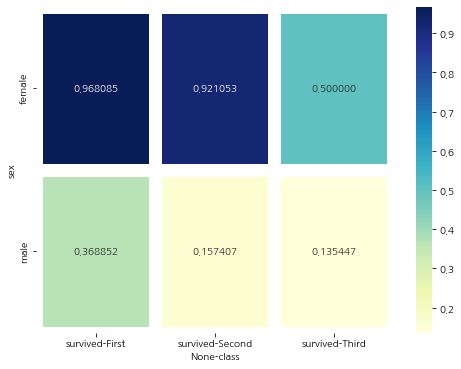

In [123]:
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True, fmt='f', # 실수형 데이터타입으로 설정
           cmap='YlGnBu', # cmap으로 전체적인 컬러 조정 가능
           linewidth=12.5, # 셀 사이 경계선 굵기
           cbar=True) # treu -> 우측에 colorbar가 생김 